In [138]:
from matplotlib import pyplot as plt
import numpy as np
from HodaDatasetReader import read_hoda_cdb, read_hoda_dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import cv2 as cv

print('Reading train dataset (Train 60000.cdb)...')
X_train, Y_train = read_hoda_dataset(dataset_path='./DigitDB/Train 60000.cdb',
                                images_height=32,
                                images_width=32,
                                one_hot=False,
                                reshape=True)
# np.random.seed(12)
randomTrainingPermutationArray = np.random.permutation(len(X_train))
X_train = X_train[randomTrainingPermutationArray]
Y_train = Y_train[randomTrainingPermutationArray]
X_CV = X_train[5000:10000]
Y_CV = Y_train[5000:10000]
X_train = X_train[:5000]
Y_train = Y_train[:5000]


print('Reading test dataset (Test 20000.cdb)...')
X_test, Y_test = read_hoda_dataset(dataset_path='./DigitDB/Test 20000.cdb',
                              images_height=32,
                              images_width=32,
                              one_hot=False,
                              reshape=True)

randomTestingPermutationArray = np.random.permutation(len(X_test))
X_test = X_test[randomTestingPermutationArray]
Y_test = Y_test[randomTestingPermutationArray]
X_test = X_test[:5000]
Y_test = Y_test[:5000]


Reading train dataset (Train 60000.cdb)...
Reading test dataset (Test 20000.cdb)...


In [139]:
########################
# Creating a random forest classifier before PCA

model1 = RandomForestClassifier(n_estimators=30)
model1.fit(X_train, Y_train)
ypred1 = model1.predict(X_test)
print(ypred1)

#########

cm = confusion_matrix(Y_test, ypred1)
print("confusion matrix : ")
print(cm,"\n")
acc = accuracy_score(Y_test, ypred1)
print("accuracy : ",acc)

# Confusion matrix is more exact

[9. 8. 2. ... 9. 9. 7.]
confusion matrix : 
[[458   0   0   0   0   4   1   0   0   0]
 [  3 488   3   0   1   0   2   0   0   1]
 [  0  14 450  15   6   0   3   0   0   7]
 [  0   1  42 441  18   3   1   2   0   2]
 [  1   1  30  22 450   6   7   0   0   2]
 [  4   1   0   0   4 466   1   1   7   2]
 [  2   4   6   2   3   0 471   2   0  35]
 [  1   0   5   1   1   3  14 487   0   0]
 [  2   1   0   0   4   3   1   0 486   9]
 [  0  16   2   1   2   0  19   0   6 440]] 

accuracy :  0.9274


In [140]:
########################
# Performing dimensionality reduction using PCA

pca = PCA(n_components=64)
X_train_afterPCA = pca.fit_transform(X_train)
X_test_afterPCA = pca.fit_transform(X_test)

In [141]:
########################
# Creating a random forest classifier after PCA

model = RandomForestClassifier(n_estimators=30)
model.fit(X_train_afterPCA, Y_train)
ypred = model.predict(X_test_afterPCA)
print(ypred)

[6. 5. 4. ... 2. 6. 7.]


###################################
6.0

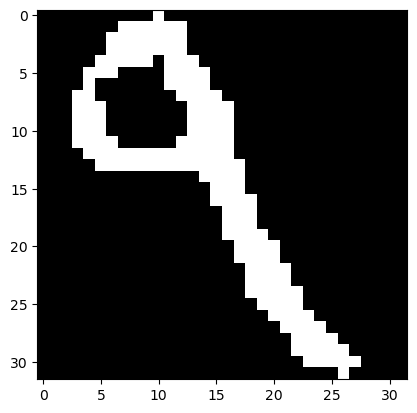

###################################
5.0

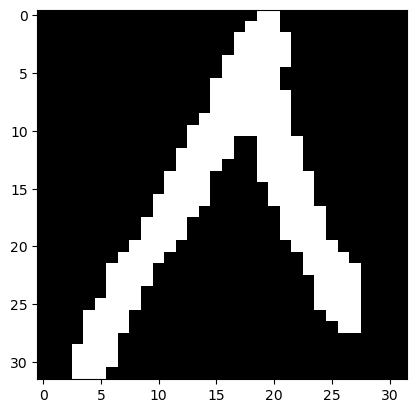

###################################
4.0

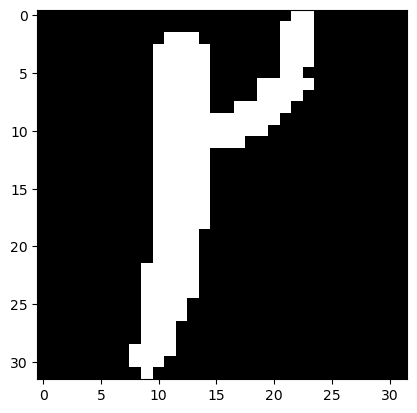

###################################
7.0

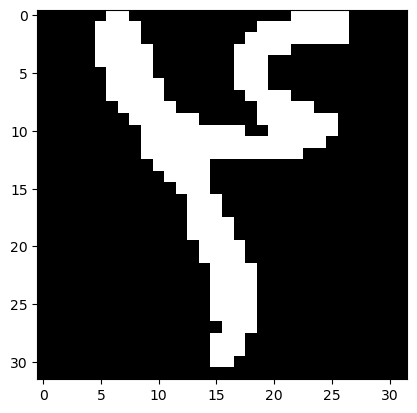

###################################
1.0

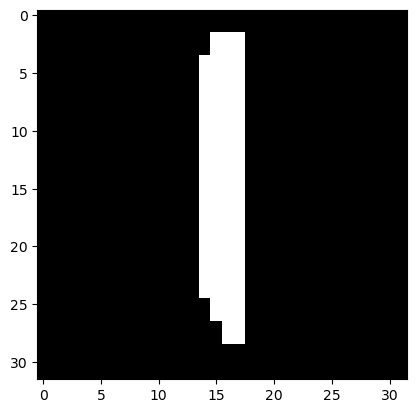

###################################
2.0

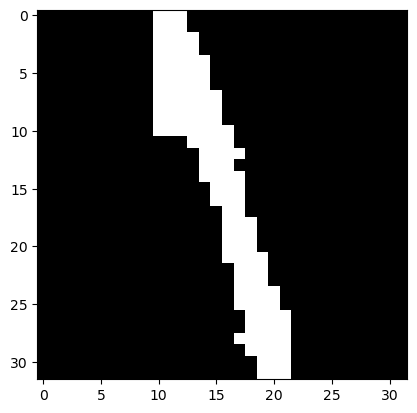

###################################
6.0

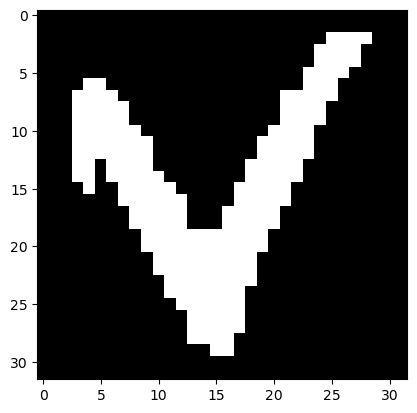

###################################
6.0

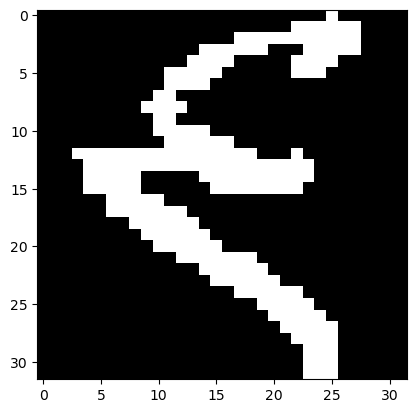

###################################
4.0

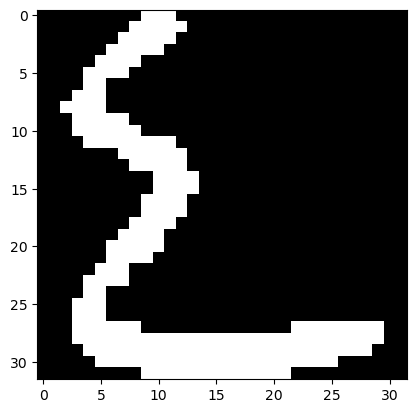

###################################
2.0

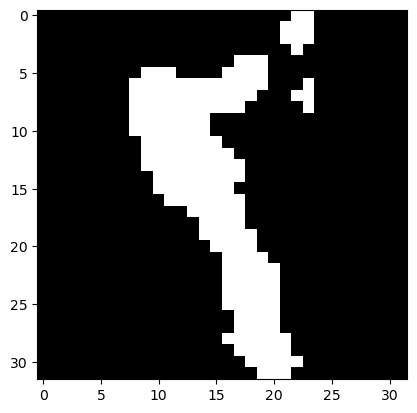

In [142]:
# Show the real test image
# printing 10 images with their predicted labels as test
for i in range(10):
    print("###################################")
    print(ypred[i] ,end="")
    plt.imshow(X_test[i].reshape((32, 32)), cmap='gray')
    plt.show()


In [143]:
cm = confusion_matrix(Y_test, ypred)
print("confusion matrix : ")
print(cm,"\n")
acc = accuracy_score(Y_test, ypred)
print("accuracy : ",acc)

# Confusion matrix is more exact

confusion matrix : 
[[382   0   0   3   6   7   2  57   4   2]
 [ 35  54 210  17  70   0  26   0   3  83]
 [  0  73 229 101  56   5  11  20   0   0]
 [  0   7  88 274  95  16  16   7   3   4]
 [  1   4  79 167 202  22  18  17   5   4]
 [  6   0   7  14  37 141   6   1 179  95]
 [  1  35   8  68  80  76 148  55   6  48]
 [  3   1  22  28  25   0  56 245   0 132]
 [ 10   2   9   1  22 172  18   4 261   7]
 [  1  51  24   2   8 214  70  10  19  87]] 

accuracy :  0.4046
